<a href="https://colab.research.google.com/github/OleksiiLatypov/DS_HW_1/blob/master/DS_HW_9/DS_HW_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [4]:
print(f'Train set: {train_images.shape[0]} examples, {train_images.shape[1:]} pixels,\nTest set: {test_images.shape[0]} examples, {test_images.shape[1:]} pixels')

Train set: 60000 examples, (28, 28) pixels,
Test set: 10000 examples, (28, 28) pixels


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
def normalize(images):
  return images / 255.

train_images = normalize(train_images)
test_images = normalize(test_images)



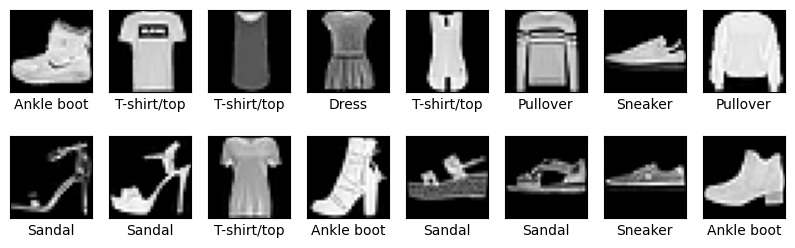

In [93]:
plt.figure(figsize=(10,3))
for i in range(16):
    plt.subplot(2, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [8]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') - logs.get('val_accuracy') >= 0.05:
      # Stop if threshold is met
      print(f"\nThe difference between train accuracy and validation more than 5% so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()


In [9]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3)

In [10]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1

In [11]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.003),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
history = model.fit(train_images,
          train_labels,
          validation_data=(test_images, test_labels),
          batch_size=200,
          epochs=100,
          callbacks=[callbacks, reduce_lr])

Epoch 1/100
300/300 [==============================] - 8s 5ms/step - loss: 0.5368 - accuracy: 0.8015 - val_loss: 0.4326 - val_accuracy: 0.8442 - lr: 0.0030
Epoch 2/100
300/300 [==============================] - 1s 5ms/step - loss: 0.3902 - accuracy: 0.8561 - val_loss: 0.4194 - val_accuracy: 0.8428 - lr: 0.0030
Epoch 3/100
300/300 [==============================] - 1s 4ms/step - loss: 0.3523 - accuracy: 0.8702 - val_loss: 0.3757 - val_accuracy: 0.8665 - lr: 0.0030
Epoch 4/100
300/300 [==============================] - 1s 4ms/step - loss: 0.3338 - accuracy: 0.8747 - val_loss: 0.3672 - val_accuracy: 0.8691 - lr: 0.0030
Epoch 5/100
300/300 [==============================] - 1s 4ms/step - loss: 0.3178 - accuracy: 0.8819 - val_loss: 0.3563 - val_accuracy: 0.8699 - lr: 0.0030
Epoch 6/100
300/300 [==============================] - 1s 4ms/step - loss: 0.3039 - accuracy: 0.8870 - val_loss: 0.3486 - val_accuracy: 0.8726 - lr: 0.0030
Epoch 7/100
300/300 [==============================] - 1s 3ms/st

In [13]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3513 - accuracy: 0.9014


[0.3513464629650116, 0.9014000296592712]

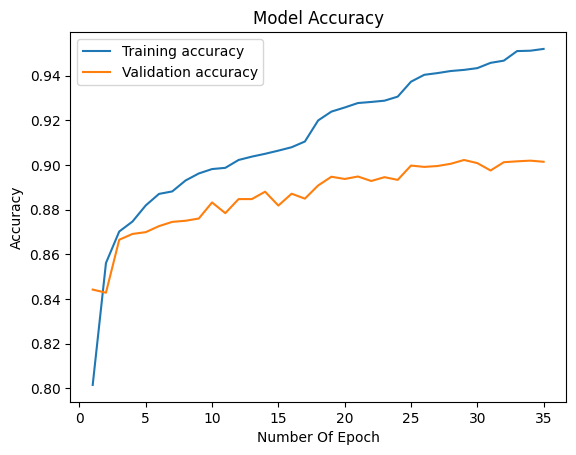

In [82]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(list(range(1, len(train_accuracy) + 1)), train_accuracy, label='Training accuracy')
plt.plot(list(range(1, len(train_accuracy) + 1)), val_accuracy, label='Validation accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Number Of Epoch')
plt.ylabel('Accuracy')
plt.show()

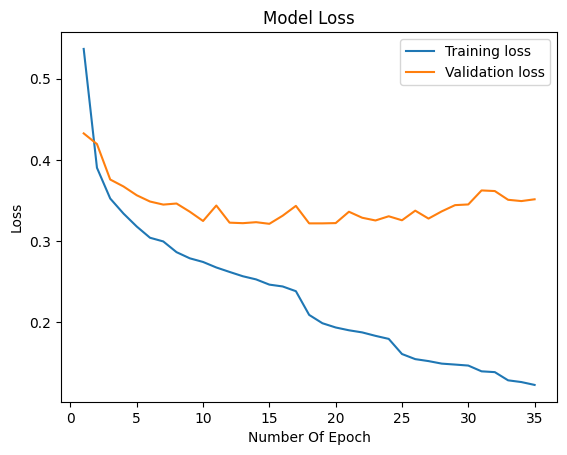

In [83]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(list(range(1, len(train_loss) + 1)), train_loss, label='Training loss')
plt.plot(list(range(1, len(train_loss) + 1)), val_loss, label='Validation loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Number Of Epoch')
plt.ylabel('Loss')
plt.show()

313/313 [==============================] - 1s 2ms/step


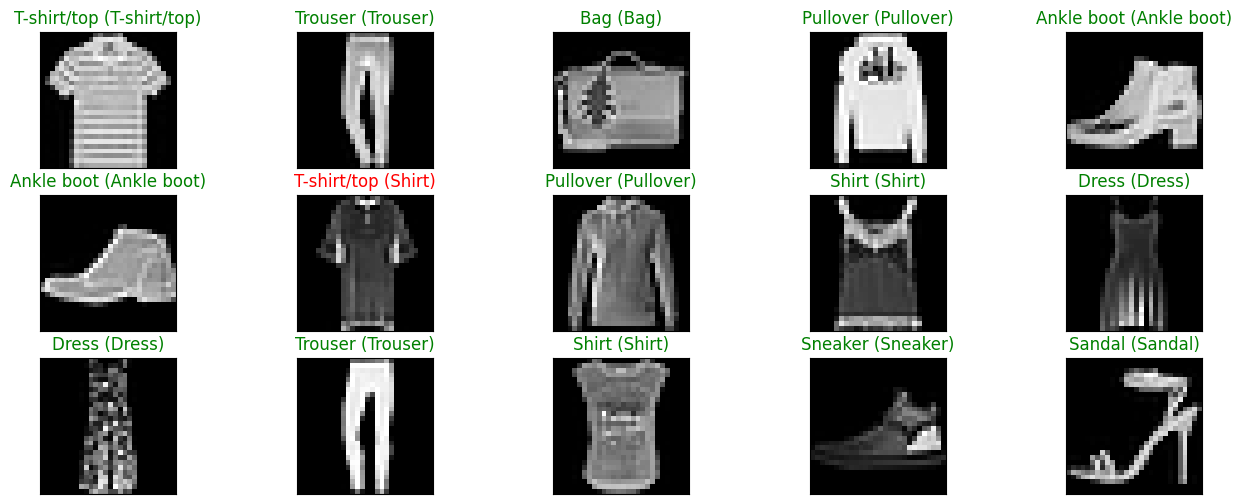

In [71]:
predictions = model.predict(test_images)

figure = plt.figure(figsize=(16, 6))
display_images = np.random.choice(test_images.shape[0], size=15, replace=False)
for i, index in enumerate(display_images):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(test_images[index], cmap='gray')
    predict_index = np.argmax(predictions[index])
    #print(f'{predict_index}: {class_names[predict_index]}')
    true_index = test_labels[index]
    ax.set_title("{} ({})".format(class_names[predict_index],
                                  class_names[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

In [57]:
predicted_labels = np.argmax(predictions, axis=1)
report = classification_report(test_labels, predicted_labels, target_names=class_names)
print(report)

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.86      0.85      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.82      0.83      0.82      1000
       Dress       0.91      0.91      0.91      1000
        Coat       0.83      0.82      0.83      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.74      0.72      0.73      1000
     Sneaker       0.96      0.97      0.96      1000
         Bag       0.97      0.98      0.98      1000
  Ankle boot       0.96      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



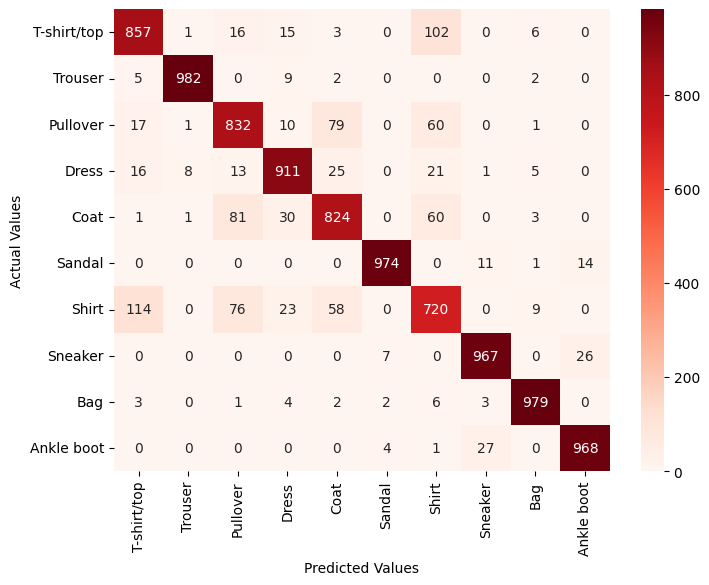

In [81]:
cm = confusion_matrix(test_labels, predicted_labels)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

Згідно результатів Classification Report і Confusion Matrix наша нейромережа  добре справилася з розпізнаванням усіх зображень одягу. Найбільшу точність вона показала при розпізнаванні зображень Trouser, Bag, Sandal, а найменшу для зображень Shirt (згідно Confusion Matrix можна побачити, що найчастіше наша модель помилково передбачає T-shirt/Top замість Shirt).